BAYESIAN DEEP ACTIVE LEARNING

In [2]:
import numpy as np
import tensorflow as tf
from scipy import signal
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, MaxPooling1D, Flatten, Dense, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score

In [3]:
file_path = "E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 1"
file_path2 = "E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 2"

In [4]:
emg_G1= np.load(file_path+"/emg_grade1_aipms.npy");
emg_G2= np.load(file_path2+"/emg_grade2_aipms.npy");
print(emg_G1.shape)
print(emg_G2.shape)

(1000, 6926, 5)
(1000, 6926, 5)


In [5]:
acc_G1 = np.load(file_path+"/acc_grade1_aipms.npy");
print(acc_G1.shape)
acc_G2 = np.load(file_path2+"/acc_grade2_aipms.npy");
print(acc_G2.shape)

(1000, 815, 15)
(1000, 815, 15)


In [6]:
gyro_G1 = np.load(file_path+"/gyr_grade1_aipms.npy");
print(gyro_G1.shape)
gyro_G2 = np.load(file_path2+"/gyr_grade2_aipms.npy");
print(gyro_G2.shape)

(1000, 815, 15)
(1000, 815, 15)


In [7]:
chN=5;ax=3;
seglenE = 6926;# int(np.round(1.25*fs[0])); # number of samples to downsample to
seglenA = 815;# int(np.round(1.25*fs[1])); # number of samples to downsample to
#n_steps=10;n_lengthE=300; n_lengthA=40;

In [8]:
emg_grade1 = emg_G1.reshape((emg_G1.shape[0],chN, seglenE));
print(emg_grade1.shape)

emg_grade2 = emg_G2.reshape((emg_G2.shape[0],chN, seglenE));
print(emg_grade2.shape)

(1000, 5, 6926)
(1000, 5, 6926)


In [9]:
emg_g1 = signal.resample(emg_grade1, seglenA, t=None, axis=2);
print(emg_g1.shape)

emg_g2 = signal.resample(emg_grade2, seglenA, t=None, axis=2);
print(emg_g2.shape)

(1000, 5, 815)
(1000, 5, 815)


In [10]:
emg = np.transpose(emg_grade1,axes=(0,2,1));
print(emg.shape)
emg_g1 = np.transpose(emg_g1,axes=(0,2,1));
print(emg_g1.shape)

#grade 2
emg_2 = np.transpose(emg_grade2,axes=(0,2,1));
print(emg_2.shape)
emg_g2 = np.transpose(emg_g2,axes=(0,2,1));
print(emg_g2.shape)

(1000, 6926, 5)
(1000, 815, 5)
(1000, 6926, 5)
(1000, 815, 5)


In [11]:
#Single feature matrix
X_G1 = np.concatenate((emg_g1,acc_G1,gyro_G1),axis=2)
X_G2 = np.concatenate((emg_g2,acc_G2,gyro_G2),axis=2)
print(X_G1.shape)
print(X_G2.shape)


(1000, 815, 35)
(1000, 815, 35)


In [12]:
acc_grade1 = X_G1 
acc_grade2 = X_G2 
X_combined = np.vstack((acc_grade1,acc_grade2)) #np.vstack((acc_grade1, acc_grade2))
print(X_combined.shape)

(2000, 815, 35)


In [13]:
label_activity_grade1 = np.load("E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 1\\labels_activity_grade1_aipms.npy")
label_activity_grade2 = np.load("E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 2\\labels_activity_grade2_aipms.npy")

In [14]:
y_raw_grade1 = [[activity, 10] for activity in label_activity_grade1]
y_raw_grade2 = [[activity, 11] for activity in label_activity_grade2]
y_raw_combined = y_raw_grade1+y_raw_grade2
print(y_raw_combined)


[[np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(0), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(1), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(2), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(3), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(4), 10], [np.int32(5), 10], [np.int32(5), 10], [np.int32(5

In [15]:
mlb = MultiLabelBinarizer()
y_combined = mlb.fit_transform(y_raw_combined)
print(y_combined)
print(y_combined.shape)
y_combined

[[1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 0 1]]
(2000, 12)


array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1]])

In [16]:
#Bayesian Deep Learning: Implement MC Dropout
class MCDropout(Dropout):
    def call(self, inputs, trtaining=True):
        return super().call(inputs, training=True) #always enable dropout for MC inference

In [17]:
#Function to create Bayesian classifier
def create_bayesian_classifier(input_shape):
    input_layer = Input(shape=input_shape)
    conv1 = Conv1D(64, kernel_size=3,activation='relu')(input_layer)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    conv2 = Conv1D(128, kernel_size=3, activation='relu')(pool1)
    pool2 = MaxPooling1D(pool_size=2)(conv2)
    flat = Flatten()(pool2)
    dense = Dense(128, activation='relu')(flat)
    dropout = MCDropout(0.5)(dense) #use MC dropout
    output_layer = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs = input_layer, outputs = output_layer)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
#Active learning Acuisition Function (BLAD)
def bald_acquisition(model, X_pool, T=10):
    mc_preds = np.array([model.predict(X_pool) for _ in range(T)])  # T stochastic passes

    mean_preds = mc_preds.mean(axis=0)

    entropy = -np.sum(mean_preds*np.log(mean_preds + 1e-10), axis=1)
    return np.argsort(-entropy)[:10] #select top 10 uncertain samples

In [19]:
#load and preprocessed data (same as orginal)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined)
X_pool = X_test.copy() 

In [20]:
input_shape = (X_train.shape[1],X_train.shape[2])

In [21]:
num_labels = y_train.shape[1]
input_shape = X_train.shape[1:]
binary_models = []
history_list = []
accuracy_scores = []
# Train Bayesian binary classifiers
for label_idx in range(num_labels):
    print(f"Training Bayesian classifier for label {label_idx + 1}/{num_labels}...")
    model = create_bayesian_classifier(input_shape)
    history = model.fit(X_train, y_train[:, label_idx], epochs=50, batch_size=32, verbose=2, validation_data=(X_test, y_test[:, label_idx]))
    binary_models.append(model)
    history_list.append(history)

# Active Learning Loop
for iteration in range(5):  # Select new samples iteratively
    for label_idx, model in enumerate(binary_models):
        uncertain_indices = bald_acquisition(model, X_pool)
        new_samples = X_pool[uncertain_indices]
        new_labels = y_test[uncertain_indices]
        
        X_train = np.vstack([X_train, new_samples])
        y_train = np.vstack([y_train, new_labels])
        
        model.fit(X_train, y_train[:, label_idx], epochs=5, batch_size=32, verbose=2)

# Evaluate final models
binary_predictions = []
for label_idx, model in enumerate(binary_models):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    binary_predictions.append(y_pred)
    acc = accuracy_score(y_test[:, label_idx], y_pred)
    accuracy_scores.append(acc)
    print(f"Accuracy for label {label_idx}: {acc:.4f}")

binary_predictions = [((model.predict(X_test) > 0.5).astype(int)) for model in binary_models]
binary_predictions = np.hstack(binary_predictions)
print("Final Classification Report:")
print(classification_report(y_test, binary_predictions, target_names=[str(label) for label in mlb.classes_]))


Training Bayesian classifier for label 1/12...
Epoch 1/50
50/50 - 3s - 68ms/step - accuracy: 0.8825 - loss: 1.9058 - val_accuracy: 0.9325 - val_loss: 0.1265
Epoch 2/50
50/50 - 2s - 43ms/step - accuracy: 0.9700 - loss: 0.0836 - val_accuracy: 0.9650 - val_loss: 0.0760
Epoch 3/50
50/50 - 2s - 38ms/step - accuracy: 0.9850 - loss: 0.0389 - val_accuracy: 0.9700 - val_loss: 0.0536
Epoch 4/50
50/50 - 2s - 38ms/step - accuracy: 0.9894 - loss: 0.0284 - val_accuracy: 0.9750 - val_loss: 0.0660
Epoch 5/50
50/50 - 2s - 37ms/step - accuracy: 0.9931 - loss: 0.0179 - val_accuracy: 0.9825 - val_loss: 0.0648
Epoch 6/50
50/50 - 2s - 38ms/step - accuracy: 0.9981 - loss: 0.0120 - val_accuracy: 0.9850 - val_loss: 0.0435
Epoch 7/50
50/50 - 2s - 39ms/step - accuracy: 0.9969 - loss: 0.0114 - val_accuracy: 0.9725 - val_loss: 0.0847
Epoch 8/50
50/50 - 2s - 37ms/step - accuracy: 0.9931 - loss: 0.0191 - val_accuracy: 0.9775 - val_loss: 0.0893
Epoch 9/50
50/50 - 2s - 37ms/step - accuracy: 0.9969 - loss: 0.0108 - val

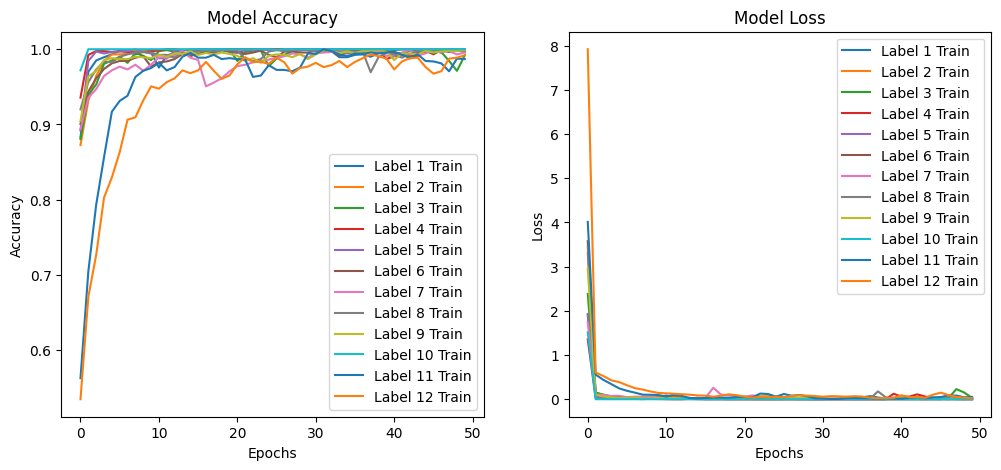

In [22]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
for i, history in enumerate(history_list):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label=f'Label {i+1} Train')
    #plt.plot(history.history['val_accuracy'], label=f'Label {i+1} Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label=f'Label {i+1} Train')
    #plt.plot(history.history['val_loss'], label=f'Label {i+1} Val')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.show()


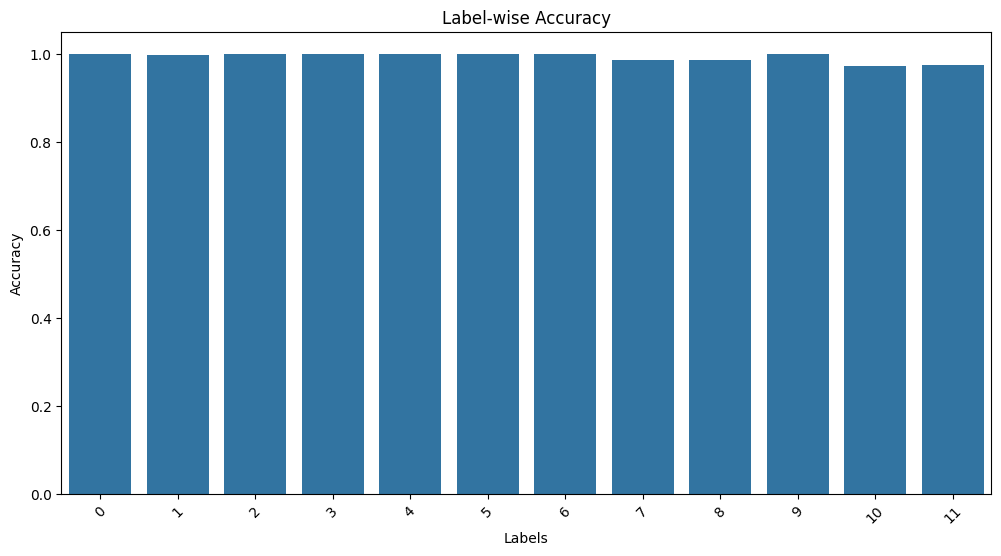

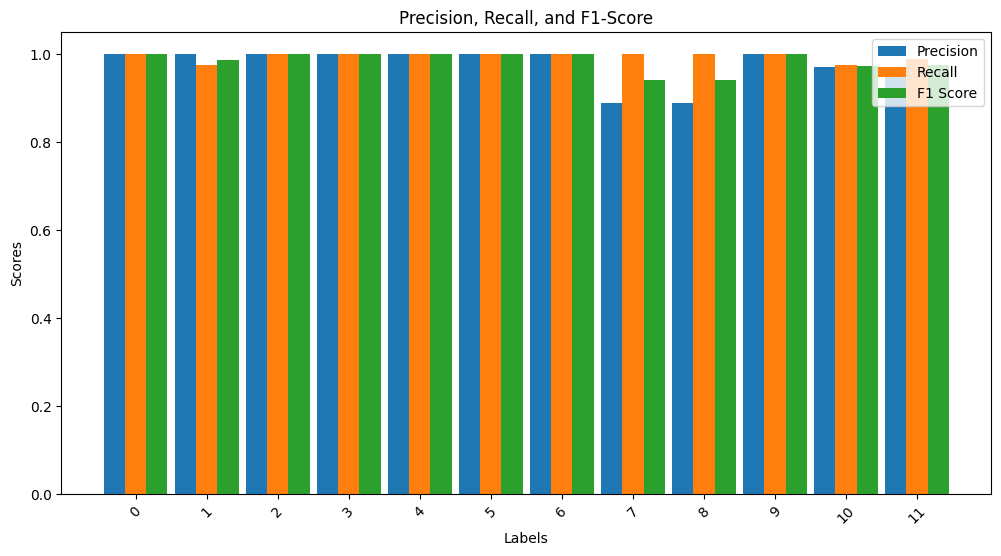

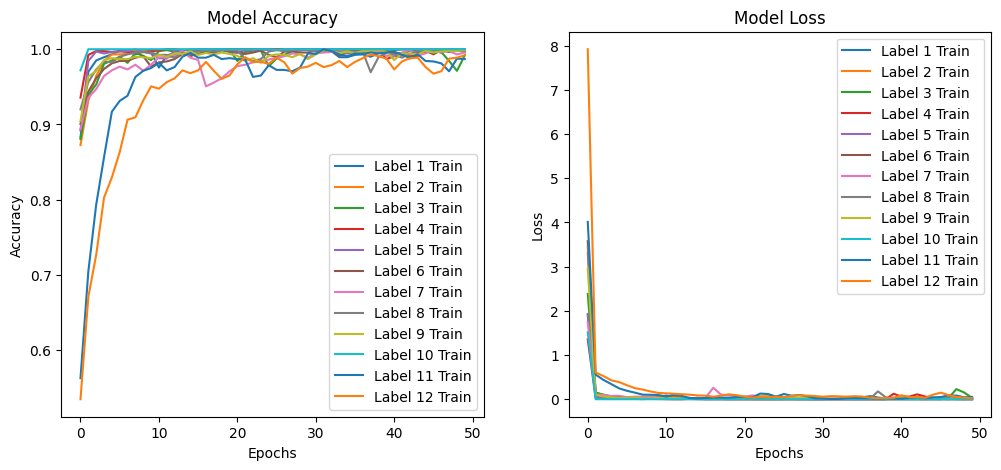

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# Assuming y_test and binary_predictions are available from your training process

# Compute classification report
report = classification_report(y_test, binary_predictions, target_names=[str(label) for label in mlb.classes_], output_dict=True)

# Extract metrics
accuracy_scores = [accuracy_score(y_test[:, idx], binary_predictions[:, idx]) for idx, label in enumerate(mlb.classes_)]
precision = [report[str(label)]['precision'] for label in mlb.classes_]
recall = [report[str(label)]['recall'] for label in mlb.classes_]
f1_scores = [report[str(label)]['f1-score'] for label in mlb.classes_]


# Save to Excel
metrics_df = pd.DataFrame({
    'Label': mlb.classes_,
    'Accuracy': accuracy_scores,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_scores
})
metrics_df.to_excel("classification_metrics.xlsx", index=False)

# Plot Accuracy Bar Graph
plt.figure(figsize=(12, 6))
sns.barplot(x=mlb.classes_, y=accuracy_scores)
plt.xlabel("Labels")
plt.ylabel("Accuracy")
plt.title("Label-wise Accuracy")
plt.xticks(rotation=45)
plt.show()

# Plot Precision, Recall, and F1-Score Bar Graph
plt.figure(figsize=(12, 6))
x = np.arange(len(mlb.classes_))
width = 0.3
plt.bar(x - width, precision, width=width, label='Precision')
plt.bar(x, recall, width=width, label='Recall')
plt.bar(x + width, f1_scores, width=width, label='F1 Score')
plt.xlabel("Labels")
plt.ylabel("Scores")
plt.title("Precision, Recall, and F1-Score")
plt.xticks(ticks=x, labels=mlb.classes_, rotation=45)
plt.legend()
plt.show()

# Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
for i, history in enumerate(history_list):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label=f'Label {i+1} Train')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label=f'Label {i+1} Train')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.show()


In [28]:
import pandas as pd

# Convert metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Label': mlb.classes_,
    'Accuracy': accuracy_scores,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_scores
})

# Extract accuracy and loss from training history
epochs = range(1, len(history_list[0].history['accuracy']) + 1)
history_data = {
    'Epoch': epochs
}

# Store accuracy and loss for each label
for i, history in enumerate(history_list):
    history_data[f'Label_{i+1}_Train_Accuracy'] = history.history['accuracy']
    history_data[f'Label_{i+1}_Train_Loss'] = history.history['loss']

history_df = pd.DataFrame(history_data)

# Save to Excel
with pd.ExcelWriter('model_results_BDAL.xlsx', engine='openpyxl') as writer:
    metrics_df.to_excel(writer, sheet_name='Label-wise Metrics_BDAL', index=False)
    history_df.to_excel(writer, sheet_name='Training History_BDAL', index=False)

print("Results saved to model_results.xlsx 🎯")


Results saved to model_results.xlsx 🎯


In [27]:
# Combine predictions into a single array
binary_predictions = np.hstack(binary_predictions)
print("Final Classification Report:")
print(classification_report(y_test, binary_predictions, target_names=[str(label) for label in mlb.classes_]))

# Plot Accuracy Scores
plt.figure(figsize=(10, 5))
plt.bar(range(num_labels), accuracy_scores, color='blue')
plt.xlabel('Labels')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Label')
plt.xticks(range(num_labels), [str(label) for label in mlb.classes_], rotation=45)
plt.show()

# Plot Predictions Count
pred_counts = np.sum(binary_predictions, axis=0)
plt.figure(figsize=(10, 5))
plt.bar(range(num_labels), pred_counts, color='green')
plt.xlabel('Labels')
plt.ylabel('Predicted Count')
plt.title('Number of Predictions for Each Label')
plt.xticks(range(num_labels), [str(label) for label in mlb.classes_], rotation=45)
plt.show()


Final Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [400, 4800]

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from scipy import signal
# Load data (assuming the data loading part remains the same)
file_path = "E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 1"
file_path2 = "E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 2"
emg_G1 = np.load(file_path + "/emg_grade1_aipms.npy")
emg_G2 = np.load(file_path2 + "/emg_grade2_aipms.npy")
acc_G1 = np.load(file_path + "/acc_grade1_aipms.npy")
acc_G2 = np.load(file_path2 + "/acc_grade2_aipms.npy")
gyro_G1 = np.load(file_path + "/gyr_grade1_aipms.npy")
gyro_G2 = np.load(file_path2 + "/gyr_grade2_aipms.npy")

# Data preprocessing (assuming the preprocessing part remains the same)
chN = 5
ax = 3
seglenE = 6926
seglenA = 815
emg_grade1 = emg_G1.reshape((emg_G1.shape[0], chN, seglenE))
emg_grade2 = emg_G2.reshape((emg_G2.shape[0], chN, seglenE))
emg_g1 = signal.resample(emg_grade1, seglenA, axis=2)
emg_g2 = signal.resample(emg_grade2, seglenA, axis=2)
emg = np.transpose(emg_grade1, axes=(0, 2, 1))
emg_g1 = np.transpose(emg_g1, axes=(0, 2, 1))
emg_2 = np.transpose(emg_grade2, axes=(0, 2, 1))
emg_g2 = np.transpose(emg_g2, axes=(0, 2, 1))
X_G1 = np.concatenate((emg_g1, acc_G1, gyro_G1), axis=2)
X_G2 = np.concatenate((emg_g2, acc_G2, gyro_G2), axis=2)
acc_grade1 = X_G1
acc_grade2 = X_G2
X_combined = np.vstack((acc_grade1, acc_grade2))
label_activity_grade1 = np.load("E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 1\\labels_activity_grade1_aipms.npy")
label_activity_grade2 = np.load("E:\\ANKIT\\AIPMS rec1\\AIPMS_rec1_processed\\grade 2\\labels_activity_grade2_aipms.npy")
y_raw_grade1 = [[activity, 10] for activity in label_activity_grade1]
y_raw_grade2 = [[activity, 11] for activity in label_activity_grade2]
y_raw_combined = y_raw_grade1 + y_raw_grade2
mlb = MultiLabelBinarizer()
y_combined = mlb.fit_transform(y_raw_combined)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined)

# Custom Keras layer to wrap Convolution1DFlipout
class BayesianConv1D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, activation=None, **kwargs):
        super(BayesianConv1D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation
        self.conv_flipout = tfp.layers.Convolution1DFlipout(
            filters=filters, kernel_size=kernel_size, activation=activation
        )

    def call(self, inputs):
        return self.conv_flipout(inputs)

# Define a Bayesian Neural Network
def create_bayesian_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    conv1 = BayesianConv1D(64, kernel_size=3, activation='relu')(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    conv2 = BayesianConv1D(128, kernel_size=3, activation='relu')(pool1)
    pool2 = MaxPooling1D(pool_size=3)(conv2)
    flat = Flatten()(pool2)
    dense = tfp.layers.DenseFlipout(128, activation='relu')(flat)
    dropout = Dropout(0.5)(dense)
    outputs = tfp.layers.DenseFlipout(num_classes, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Active Learning Loop
def active_learning_loop(X_train, y_train, X_test, y_test, X_pool, y_pool, num_classes, num_iterations=10, samples_per_iteration=100):
    model = create_bayesian_cnn(X_train.shape[1:], num_classes)
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=2)
        
        # Predict on the pool and get uncertainty estimates
        predictions = model.predict(X_pool)
        uncertainty = np.max(predictions, axis=1)  # Using max probability as uncertainty measure
        
        # Select the most uncertain samples
        uncertain_indices = np.argsort(uncertainty)[:samples_per_iteration]
        X_selected = X_pool[uncertain_indices]
        y_selected = y_pool[uncertain_indices]
        
        # Add selected samples to the training set
        X_train = np.vstack((X_train, X_selected))
        y_train = np.vstack((y_train, y_selected))
        
        # Remove selected samples from the pool
        X_pool = np.delete(X_pool, uncertain_indices, axis=0)
        y_pool = np.delete(y_pool, uncertain_indices, axis=0)
        
        # Evaluate the model
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)
        print(classification_report(y_true, y_pred, target_names=[str(label) for label in mlb.classes_]))

# Initial split for active learning
X_pool, X_test, y_pool, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined)
X_train, X_pool, y_train, y_pool = train_test_split(X_pool, y_pool, test_size=0.8, random_state=42, stratify=y_pool)

# Run active learning loop
active_learning_loop(X_train, y_train, X_test, y_test, X_pool, y_pool, num_classes=y_combined.shape[1])
